## 📋 Table of Contents
* [File Overview](#files)
* [Training File](#train)
* [EEG File Example](#ex_EEG)
* [Spectrogram File Example](#ex_spec)
* [Test and Submission File](#sub)

In [1]:
# packages

# standard
import numpy as np
import pandas as pd
import time

# plots
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# configs
pd.set_option('display.max_columns', None) # we want to display all columns in this notebook

# aesthetics
default_color_1 = 'darkblue'
default_color_2 = 'darkgreen'
default_color_3 = 'darkred'

<a id='files'></a>
# File Overview

In [4]:
!chcp 65001

Active code page: 65001


In [14]:
%ls -l "../input/hms-harmful-brain-activity-classification"

 Volume in drive C is Windows
 Volume Serial Number is 3E25-FCC2

 Directory of c:\Users\takashi\Documents\Kaggle\hms-harmful-brain-activity-classification\working


 Directory of c:\Users\takashi\Documents\Kaggle\hms-harmful-brain-activity-classification\input\hms-harmful-brain-activity-classification

2024/03/07  01:15    <DIR>          .
2024/03/12  20:44    <DIR>          ..
2024/02/21  12:53    <DIR>          brain-eeg-spectrograms
2024/02/21  12:56    <DIR>          brain-spectrograms
2024/02/22  01:31    <DIR>          EEG_Spectrograms
2024/02/01  11:48    <DIR>          example_figures
2024/02/01  11:48               200 sample_submission.csv
2024/02/01  11:48                56 test.csv
2024/02/01  11:48    <DIR>          test_eegs
2024/02/01  11:48    <DIR>          test_spectrograms
2024/02/01  11:48         7,550,929 train.csv
2024/02/01  11:56    <DIR>          train_eegs
2024/02/01  12:00    <DIR>          train_spectrograms
               3 File(s)      7,551,185 bytes
  

File Not Found


In [18]:
%ls -l "../input/hms-harmful-brain-activity-classification/example_figures"

 Volume in drive C is Windows
 Volume Serial Number is 3E25-FCC2

 Directory of c:\Users\takashi\Documents\Kaggle\hms-harmful-brain-activity-classification\working


 Directory of c:\Users\takashi\Documents\Kaggle\hms-harmful-brain-activity-classification\input\hms-harmful-brain-activity-classification\example_figures

2024/02/01  11:48    <DIR>          .
2024/03/07  01:15    <DIR>          ..
2024/02/01  11:48           914,335 Sample01.pdf
2024/02/01  11:48           703,422 Sample02.pdf
2024/02/01  11:48           893,447 Sample03.pdf
2024/02/01  11:48           885,694 Sample04.pdf
2024/02/01  11:48           845,310 Sample05.pdf
2024/02/01  11:48           834,186 Sample06.pdf
2024/02/01  11:48           887,354 Sample07.pdf
2024/02/01  11:48           853,125 Sample08.pdf
2024/02/01  11:48           913,254 Sample09.pdf
2024/02/01  11:48           875,321 Sample10.pdf
2024/02/01  11:48           677,608 Sample11.pdf
2024/02/01  11:48           733,588 Sample12.pdf
2024/02/01  11

File Not Found


In [20]:
%ls -l "../input/hms-harmful-brain-activity-classification/train_spectrograms"

 Volume in drive C is Windows
 Volume Serial Number is 3E25-FCC2

 Directory of c:\Users\takashi\Documents\Kaggle\hms-harmful-brain-activity-classification\working


 Directory of c:\Users\takashi\Documents\Kaggle\hms-harmful-brain-activity-classification\input\hms-harmful-brain-activity-classification\train_spectrograms

2024/02/01  12:00    <DIR>          .
2024/03/07  01:15    <DIR>          ..
2024/02/01  11:56           564,746 1000086677.parquet
2024/02/01  11:56           672,690 1000189855.parquet
2024/02/01  11:56           540,799 1000317312.parquet
2024/02/01  11:56           807,773 1000381196.parquet
2024/02/01  11:56           503,122 1000493950.parquet
2024/02/01  11:56           542,732 1000646093.parquet
2024/02/01  11:56           744,992 1000655456.parquet
2024/02/01  11:56           765,287 1000757705.parquet
2024/02/01  11:56           725,214 1001335039.parquet
2024/02/01  11:56           816,691 1001616430.parquet
2024/02/01  11:56           481,797 1001782302.pa

File Not Found


In [21]:
%ls -l "../input/hms-harmful-brain-activity-classification/train_eegs"

 Volume in drive C is Windows
 Volume Serial Number is 3E25-FCC2

 Directory of c:\Users\takashi\Documents\Kaggle\hms-harmful-brain-activity-classification\working


 Directory of c:\Users\takashi\Documents\Kaggle\hms-harmful-brain-activity-classification\input\hms-harmful-brain-activity-classification\train_eegs

2024/02/01  11:56    <DIR>          .
2024/03/07  01:15    <DIR>          ..
2024/02/01  11:48           980,197 1000913311.parquet
2024/02/01  11:48         1,194,256 1001369401.parquet
2024/02/01  11:48           417,427 1001487592.parquet
2024/02/01  11:48         3,104,172 1001717358.parquet
2024/02/01  11:48         3,355,117 1002136740.parquet
2024/02/01  11:48           517,347 1002142157.parquet
2024/02/01  11:48         1,357,640 1002197945.parquet
2024/02/01  11:48         1,125,394 1002379034.parquet
2024/02/01  11:48           422,150 1002576868.parquet
2024/02/01  11:48         5,846,691 100261680.parquet
2024/02/01  11:48         1,456,032 1002858110.parquet
202

File Not Found


<a id='train'></a>
# Training File

In [22]:
# training data - load and preview
df_train = pd.read_csv('../input/hms-harmful-brain-activity-classification/train.csv')
df_train.head()

eeg_id  eeg_sub_id  eeg_label_offset_seconds  spectrogram_id  \
0  1628180742           0                       0.0          353733   
1  1628180742           1                       6.0          353733   
2  1628180742           2                       8.0          353733   
3  1628180742           3                      18.0          353733   
4  1628180742           4                      24.0          353733   

   spectrogram_sub_id  spectrogram_label_offset_seconds    label_id  \
0                   0                               0.0   127492639   
1                   1                               6.0  3887563113   
2                   2                               8.0  1142670488   
3                   3                              18.0  2718991173   
4                   4                              24.0  3080632009   

   patient_id expert_consensus  seizure_vote  lpd_vote  gpd_vote  lrda_vote  \
0       42516          Seizure             3         0         0          0   
1       42516          Seizure             3         0         0          0   
2       42516          Seizure             3         0         0          0   
3       42516          Seizure             3         0         0          0   
4       42516          Seizure             3         0         0          0   

   grda_vote  other_vote  
0          0           0  
1          0           0  
2          0           0  
3          0           0  
4          0           0

In [23]:
# votes columns
features_vote = ['seizure_vote', 'lpd_vote', 'gpd_vote',
                 'lrda_vote', 'grda_vote', 'other_vote']

In [24]:
# group by eeg_id to get just one row per EEG
df_train_unique_votes = df_train.groupby('eeg_id')[features_vote].mean()

# calc sum of votes for each row
df_train_unique_votes['vote_sum'] = df_train_unique_votes[features_vote].sum(axis=1)

# normalize votes (=> 100% distribution for each row/EEG)
for f in features_vote:
    df_train_unique_votes[f] = df_train_unique_votes[f] / df_train_unique_votes.vote_sum
    
df_train_unique_votes.head(10)

seizure_vote  lpd_vote  gpd_vote  lrda_vote  grda_vote  other_vote  \
eeg_id                                                                        
568657       0.000000  0.000000      0.25   0.000000   0.166667    0.583333   
582999       0.000000  0.857143      0.00   0.071429   0.000000    0.071429   
642382       0.000000  0.000000      0.00   0.000000   0.000000    1.000000   
751790       0.000000  0.000000      1.00   0.000000   0.000000    0.000000   
778705       0.000000  0.000000      0.00   0.000000   0.000000    1.000000   
1629671      1.000000  0.000000      0.00   0.000000   0.000000    0.000000   
1895581      0.076923  0.000000      0.00   0.000000   0.076923    0.846154   
2061593      0.000000  0.000000      0.00   0.000000   0.000000    1.000000   
2078097      0.000000  0.000000      0.00   0.000000   0.000000    1.000000   
2366870      0.000000  0.333333      0.00   0.000000   0.000000    0.666667   

         vote_sum  
eeg_id             
568657       12.0  
582999       14.0  
642382        1.0  
751790        1.0  
778705        2.0  
1629671       3.0  
1895581      13.0  
2061593       1.0  
2078097       2.0  
2366870       3.0

<a id='ex_EEG'></a>
# EEG File Example

In [26]:
# load an EEG file
df_eeg = pd.read_parquet('../input/hms-harmful-brain-activity-classification/train_eegs/1000913311.parquet')

In [27]:
# preview
df_eeg.head()

Fp1          F3         C3         P3          F7          T3  \
0 -105.849998  -89.230003 -79.459999 -49.230000  -99.730003  -87.769997   
1  -85.470001  -75.070000 -60.259998 -38.919998  -73.080002  -87.510002   
2    8.840000   34.849998  56.430000  67.970001   48.099998   25.350000   
3  -56.320000  -37.279999 -28.100000  -2.820000  -43.430000  -35.049999   
4 -110.139999 -104.519997 -96.879997 -70.250000 -111.660004 -114.430000   

          T5         O1         Fz         Cz         Pz        Fp2  \
0 -53.330002 -50.740002 -32.250000 -42.099998 -43.270000 -88.730003   
1 -39.680000 -35.630001 -76.839996 -62.740002 -43.040001 -68.629997   
2  80.250000  48.060001   6.720000  37.880001  61.000000  16.580000   
3   3.910000 -12.660000   8.650000   3.830000   4.180000 -51.900002   
4 -71.830002 -61.919998 -76.150002 -79.779999 -67.480003 -99.029999   

          F4          C4         P4         F8         T4          T6  \
0 -74.410004  -92.459999 -58.930000 -75.739998 -59.470001    8.210000   
1 -61.689999  -69.320000 -35.790001 -58.900002 -41.660000  196.190002   
2  55.060001   45.020000  70.529999  47.820000  72.029999  -67.180000   
3 -21.889999  -41.330002 -11.580000 -27.040001 -11.730000  -91.000000   
4 -93.610001 -104.410004 -70.070000 -89.250000 -77.260002  155.729996   

           O2          EKG  
0   66.489998  1404.930054  
1  230.669998  3402.669922  
2 -171.309998 -3565.800049  
3  -81.190002 -1280.930054  
4  264.850006  4325.370117

In [28]:
# show structure
df_eeg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fp1     10000 non-null  float32
 1   F3      10000 non-null  float32
 2   C3      10000 non-null  float32
 3   P3      10000 non-null  float32
 4   F7      10000 non-null  float32
 5   T3      10000 non-null  float32
 6   T5      10000 non-null  float32
 7   O1      10000 non-null  float32
 8   Fz      10000 non-null  float32
 9   Cz      10000 non-null  float32
 10  Pz      10000 non-null  float32
 11  Fp2     10000 non-null  float32
 12  F4      10000 non-null  float32
 13  C4      10000 non-null  float32
 14  P4      10000 non-null  float32
 15  F8      10000 non-null  float32
 16  T4      10000 non-null  float32
 17  T6      10000 non-null  float32
 18  O2      10000 non-null  float32
 19  EKG     10000 non-null  float32
dtypes: float32(20)
memory usage: 781.4 KB


In [29]:
# basis stats
df_eeg.describe()

Fp1            F3            C3            P3            F7  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean     -34.652176    -10.938655    -13.130096    -11.532683    -13.681986   
std       50.664436     54.227734     58.496956     52.669693     61.517796   
min     -204.529999   -161.149994   -168.339996   -149.820007   -173.029999   
25%      -74.690002    -56.772500    -63.412499    -56.430000    -67.365000   
50%      -35.575001    -11.450000    -12.970000    -11.840000    -14.160000   
75%        7.377500     36.080002     38.369999     33.919998     40.514998   
max      113.750000    131.250000    127.580002    117.730003    167.529999   

                 T3            T5            O1            Fz            Cz  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean     -19.996176    -12.784777    -20.799709     -5.201674     -6.507339   
std       53.165680     54.273331     43.390774     44.687992     47.822716   
min     -148.000000   -131.759995   -136.779999   -146.199997   -148.679993   
25%      -65.989998    -63.764998    -56.490002    -38.309999    -44.685000   
50%      -20.290001    -12.180000    -21.360001     -5.930000     -6.515000   
75%       26.262500     37.982500     15.972500     29.379999     32.842500   
max      118.580002    106.660004     90.889999    118.470001    116.339996   

                 Pz           Fp2            F4            C4            P4  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean     -17.611294    -16.726524      0.557746    -21.673672    -36.212128   
std       49.587502     48.962845     57.199883     57.287605     55.543560   
min     -155.199997   -167.600006   -152.330002   -156.820007   -172.270004   
25%      -58.332500    -54.230000    -48.442499    -71.432501    -83.072500   
50%      -17.620000    -17.100000      0.350000    -21.050000    -37.295000   
75%       23.974999     22.422500     49.922499     28.492500      9.652500   
max      101.800003    125.459999    142.360001    119.010002    118.370003   

                 F8            T4            T6            O2           EKG  
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000  
mean      14.523577      5.717173    -19.428684     -3.457283     15.943558  
std       55.142666     55.865898    119.250450    181.184021   3053.213379  
min     -147.369995   -125.279999   -249.190002   -326.049988  -4936.430176  
25%      -30.320000    -43.145000   -133.154995   -180.807503  -3091.449890  
50%       14.350000      5.560000    -19.240000      2.695000     16.080000  
75%       60.200001     54.775001     93.754999    175.419994   3127.127563  
max      166.139999    145.039993    227.529999    304.549988   4960.529785

In [30]:
# list of features
features_eeg = ['Fp1', 'F3', 'C3', 'P3', 'F7', 
                'T3', 'T5', 'O1', 'Fz', 'Cz', 'Pz',
                'Fp2', 'F4', 'C4', 'P4', 'F8',
                'T4', 'T6', 'O2', 'EKG']

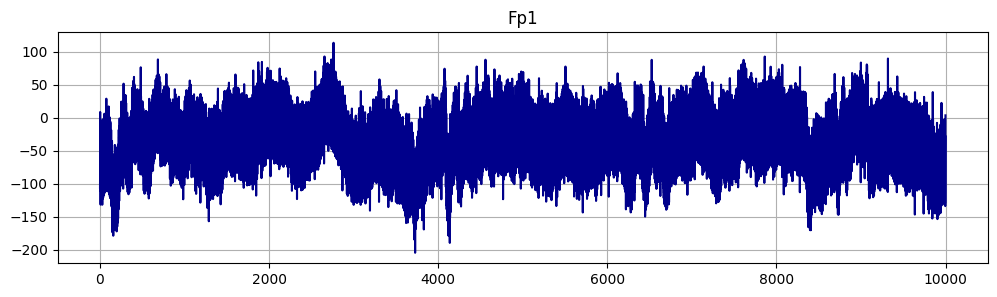

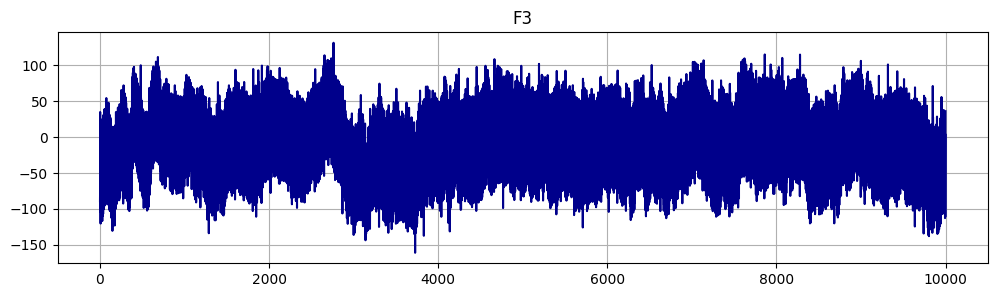

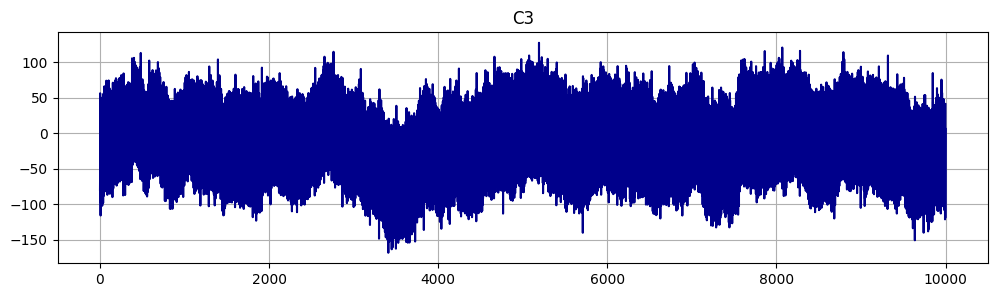

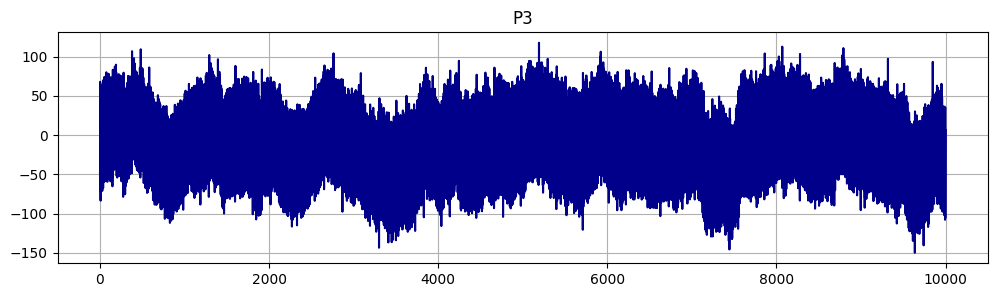

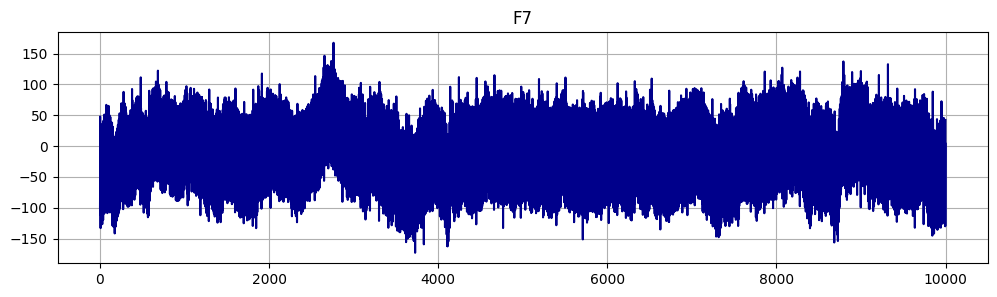

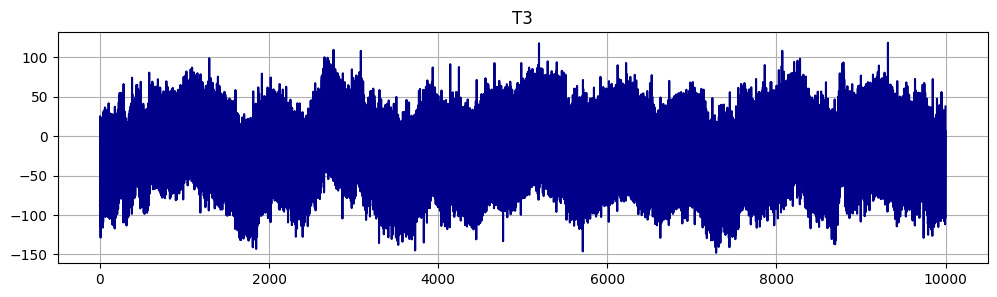

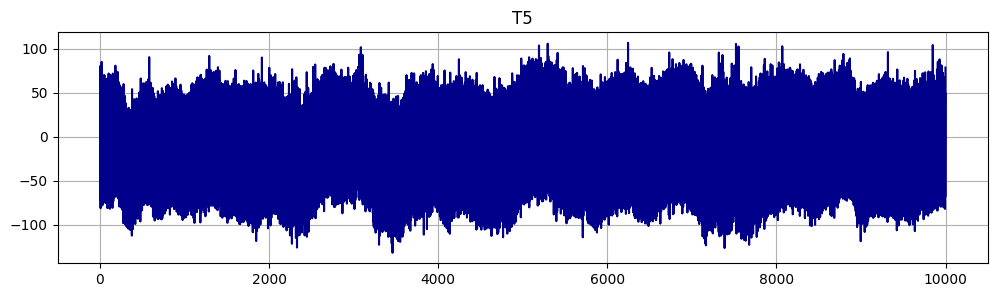

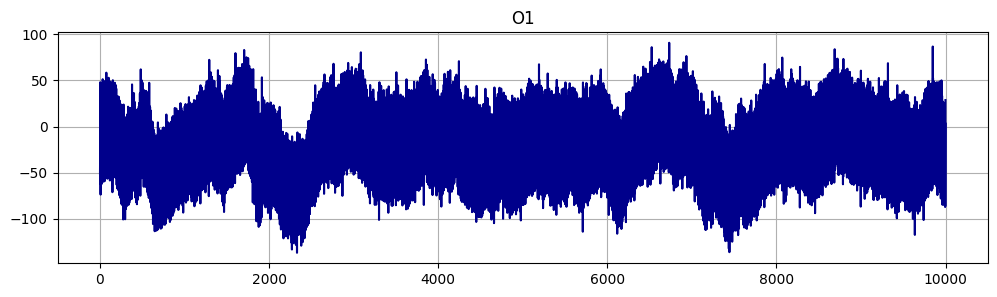

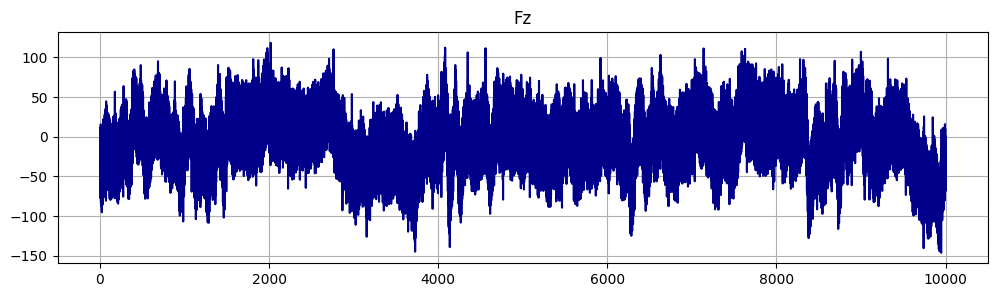

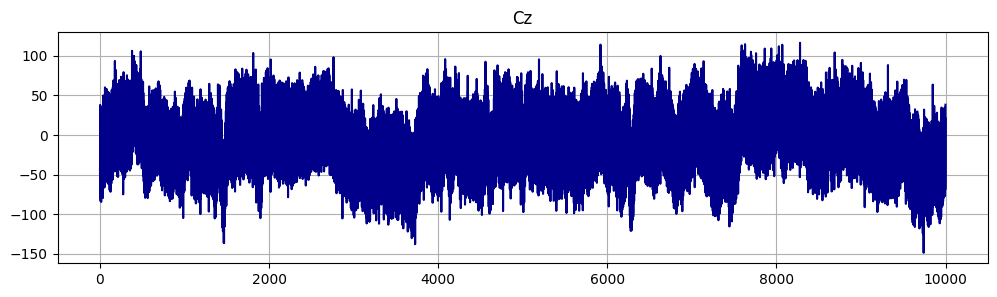

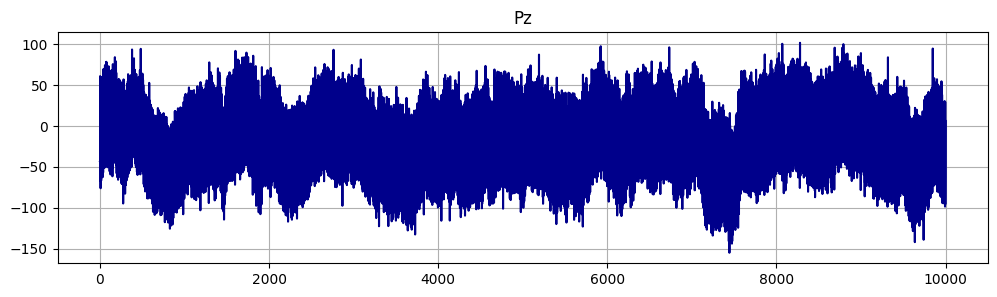

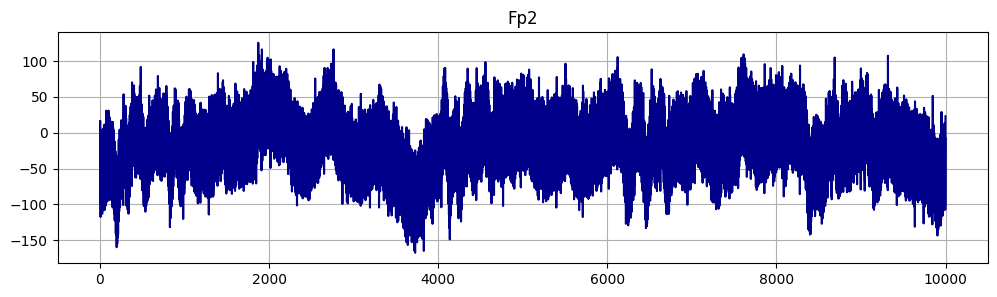

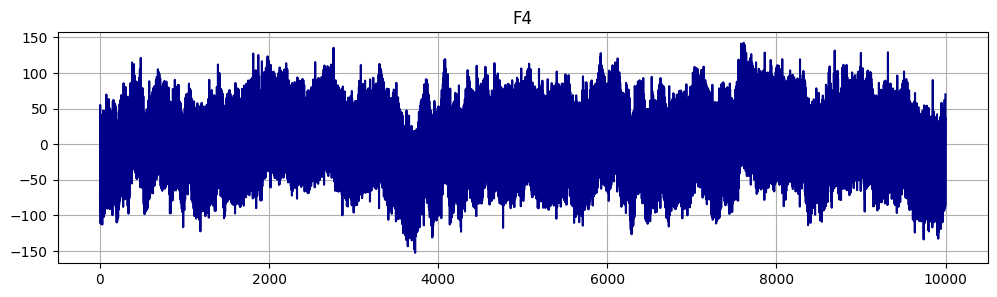

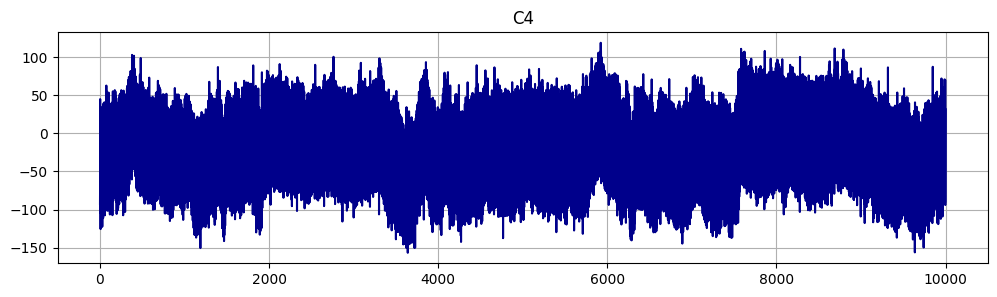

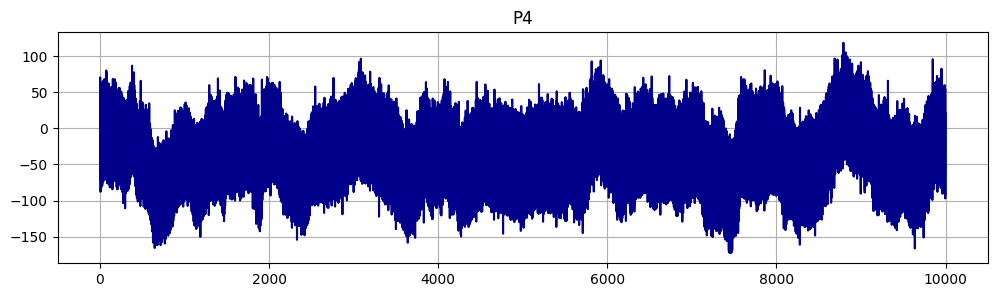

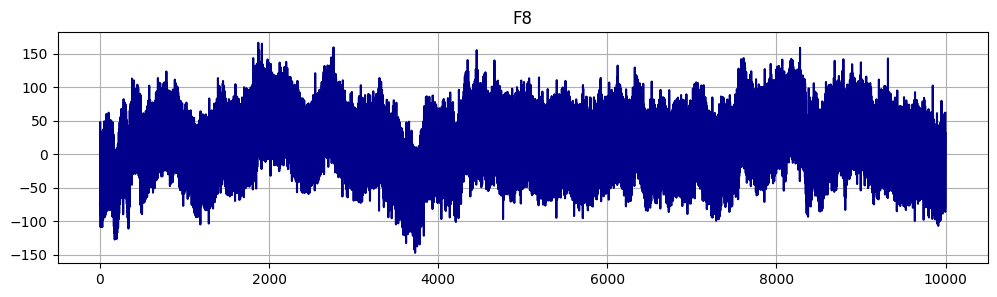

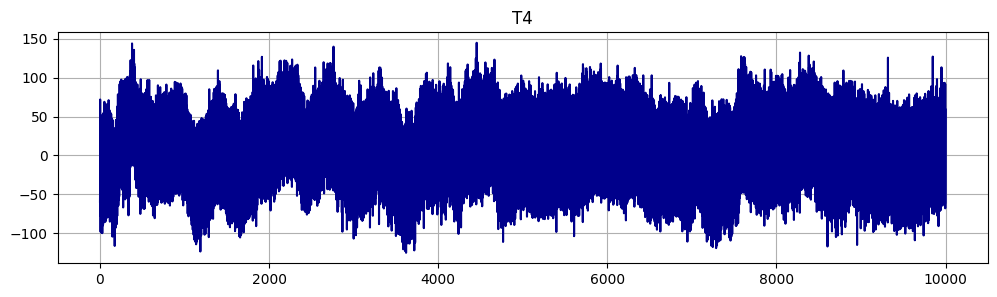

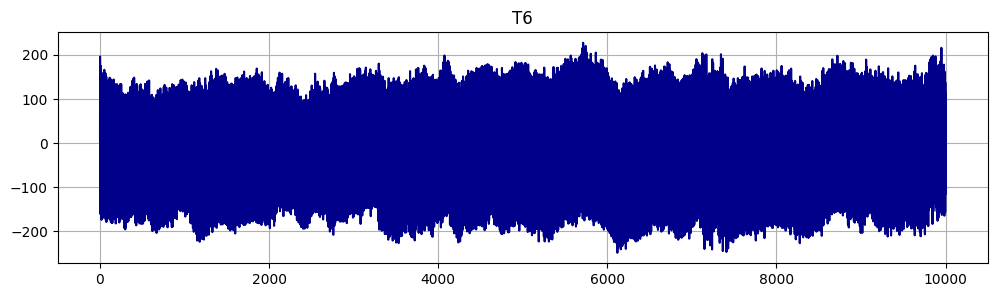

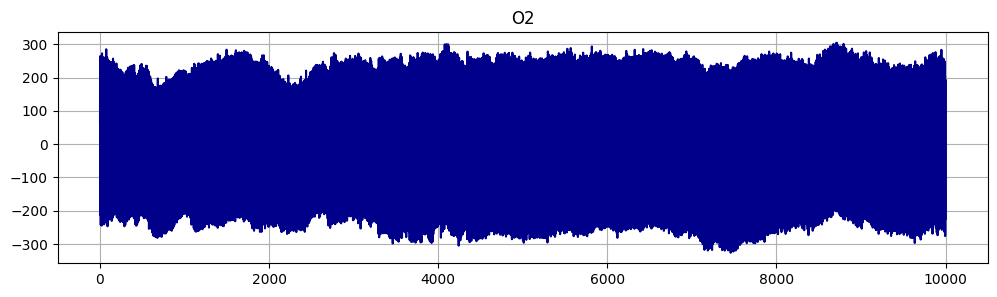

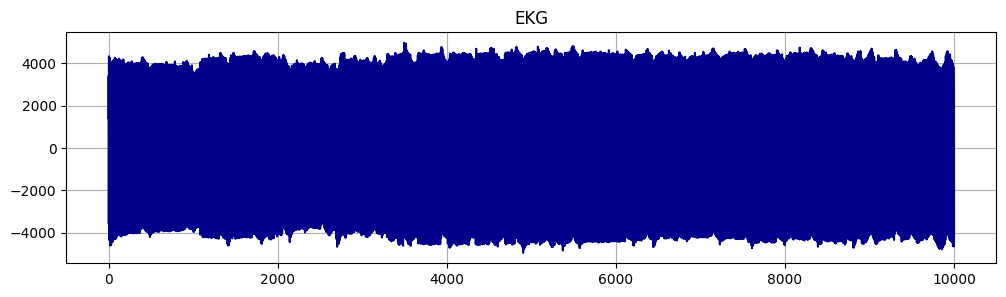

In [31]:
# plot all features - time series
for f in features_eeg:
    plt.figure(figsize=(12,3))
    plt.plot(df_eeg[f], color=default_color_1)
    plt.title(f)
    plt.grid()
    plt.show()

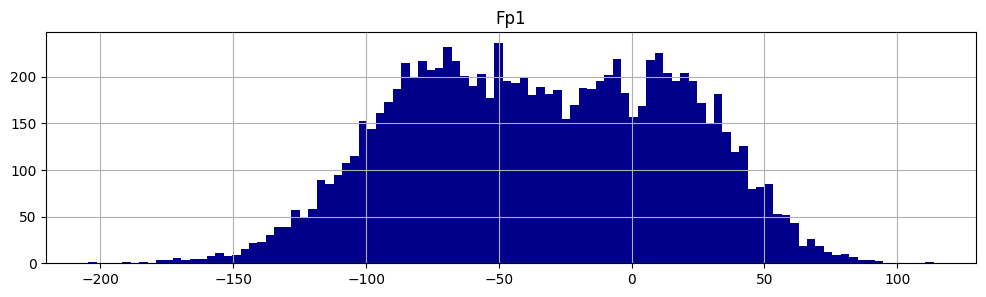

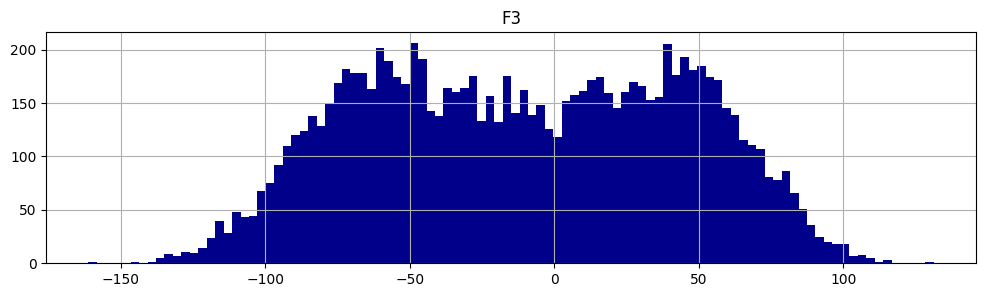

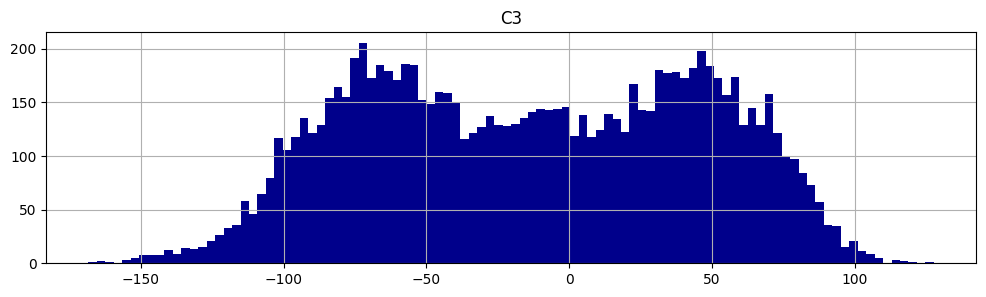

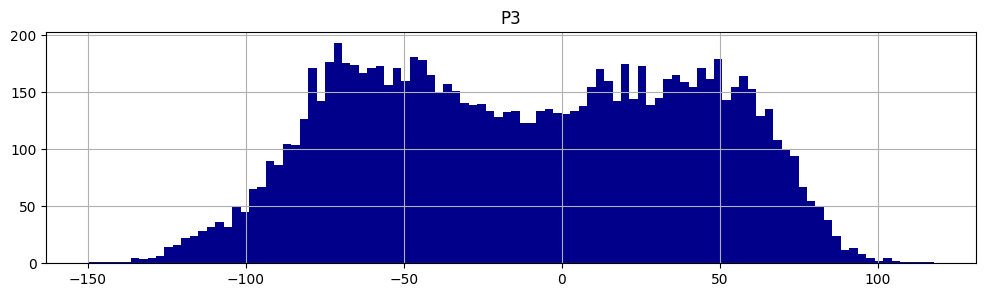

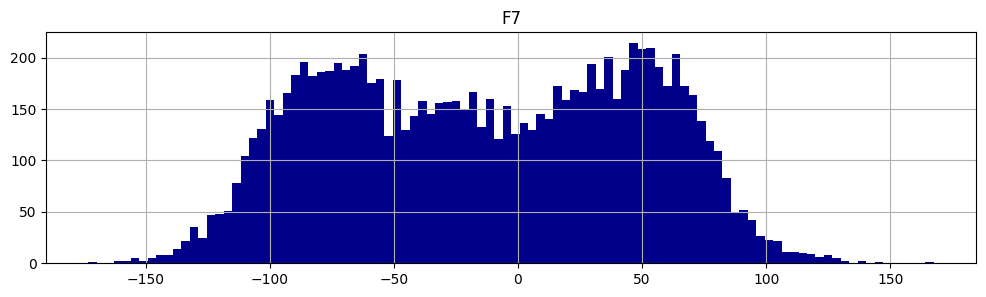

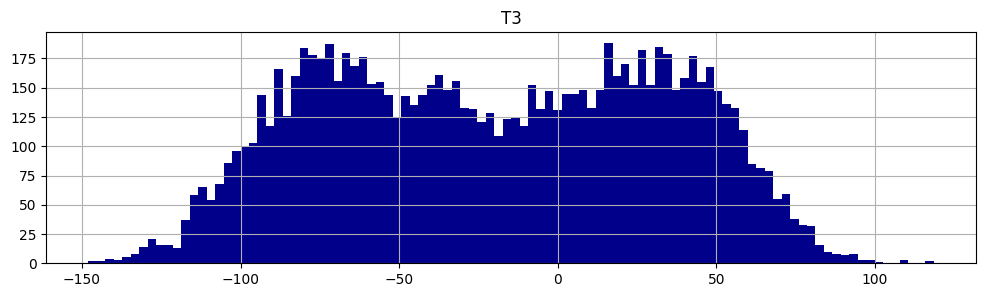

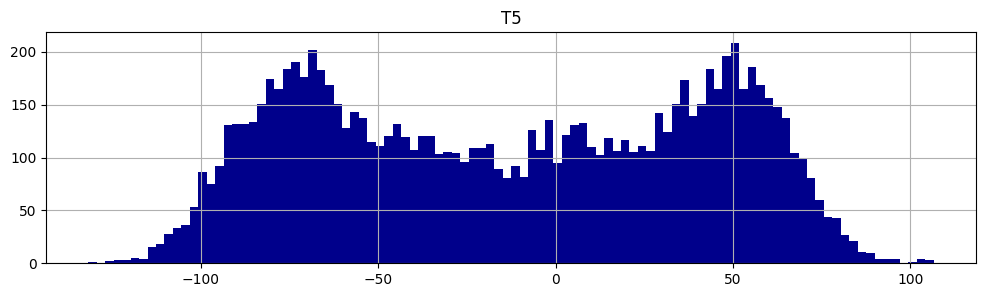

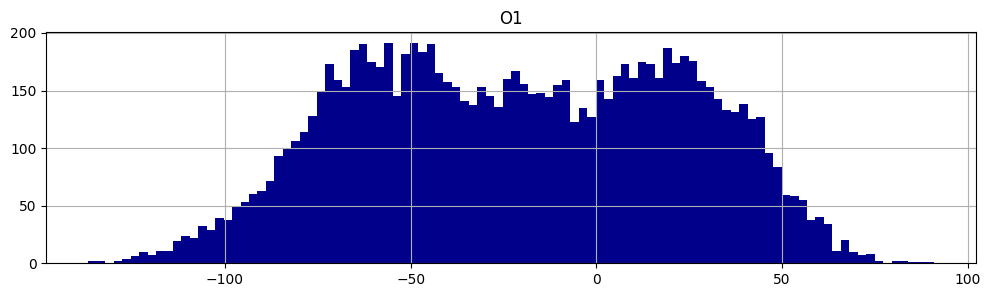

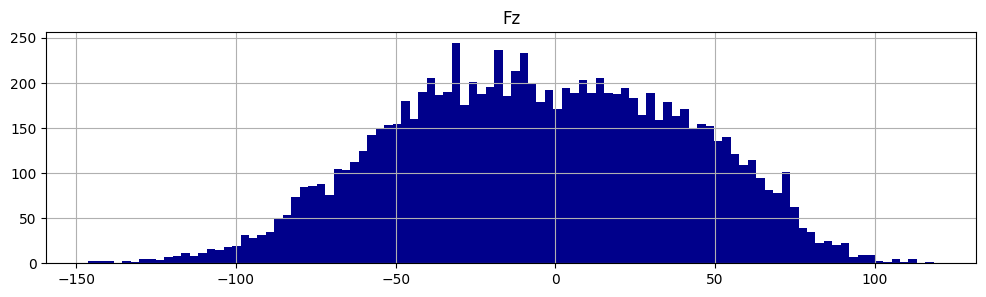

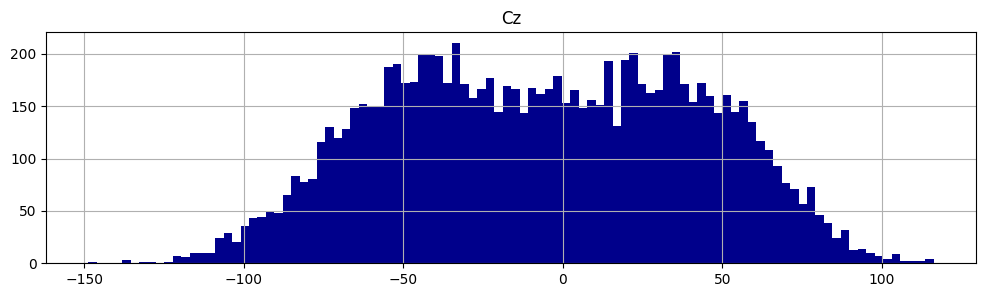

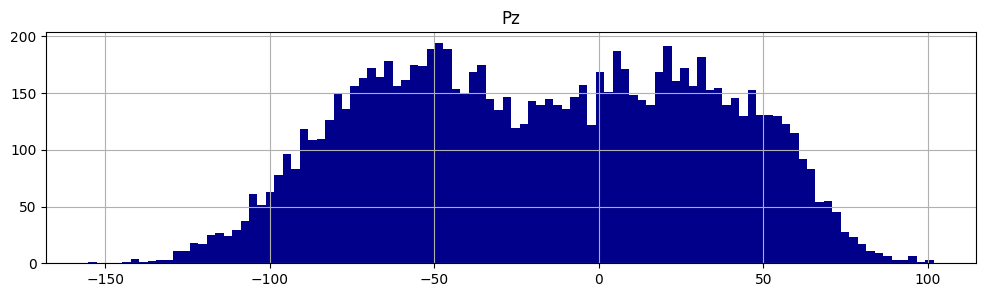

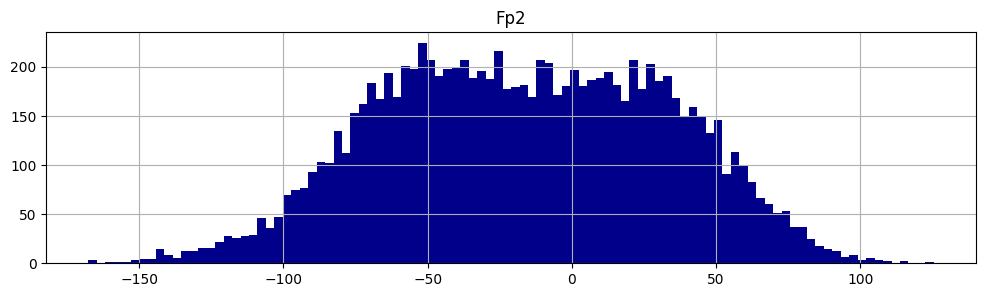

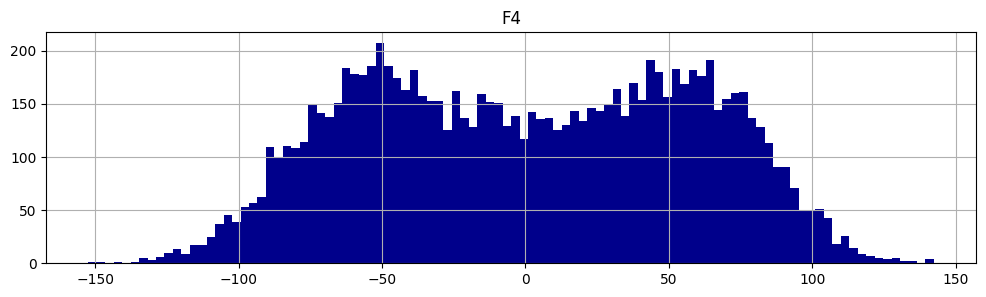

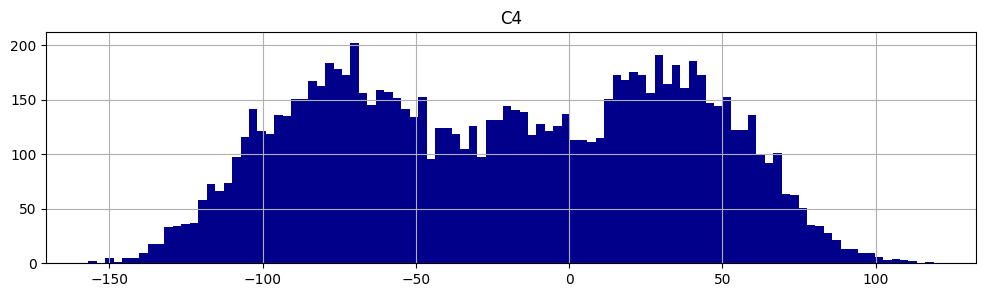

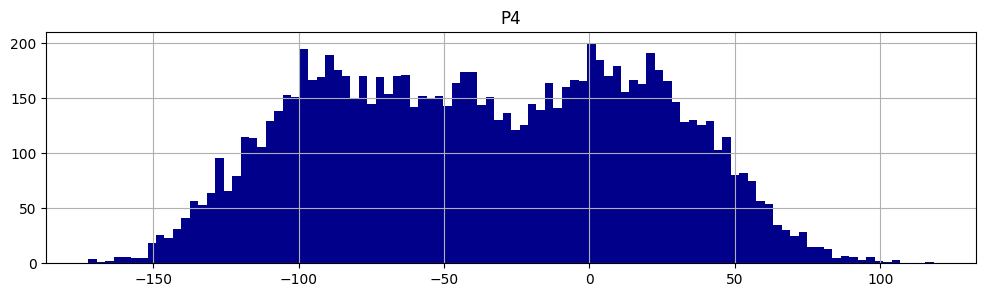

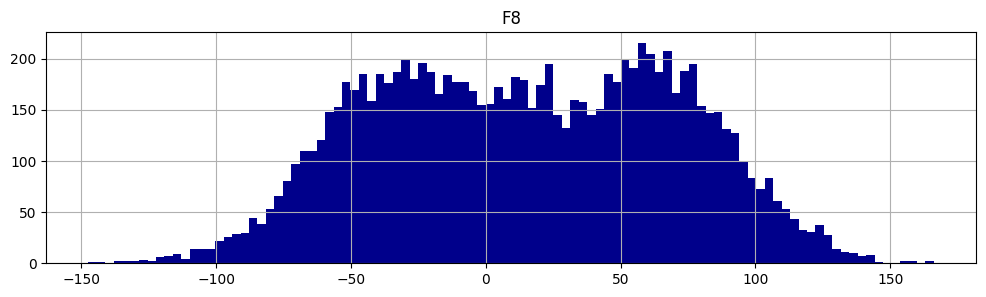

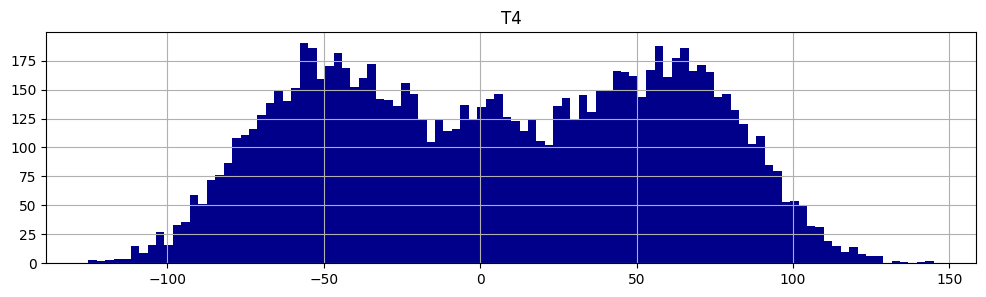

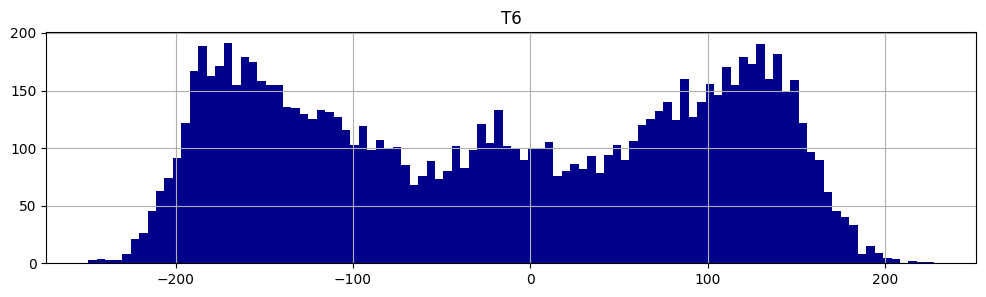

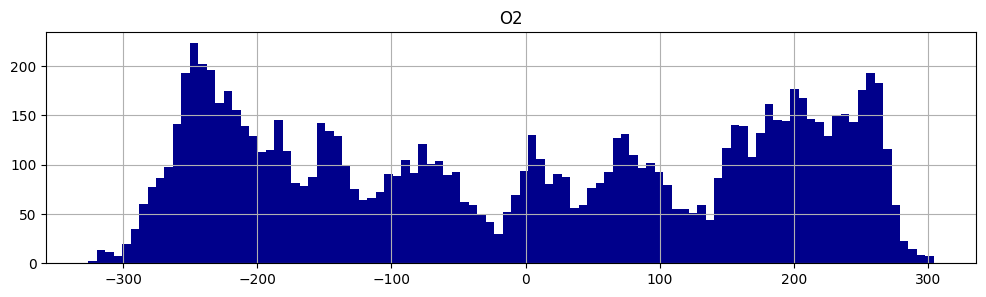

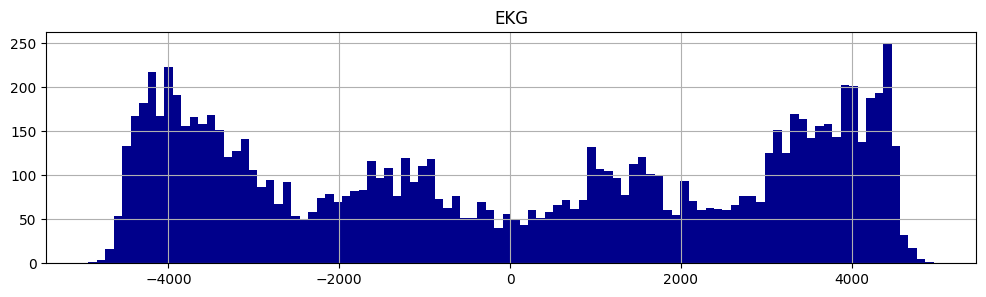

In [32]:
# plot all features - distributions
for f in features_eeg:
    plt.figure(figsize=(12,3))
    plt.hist(df_eeg[f], bins=100,
             color=default_color_1)
    plt.title(f)
    plt.grid()
    plt.show()

### Correlation:

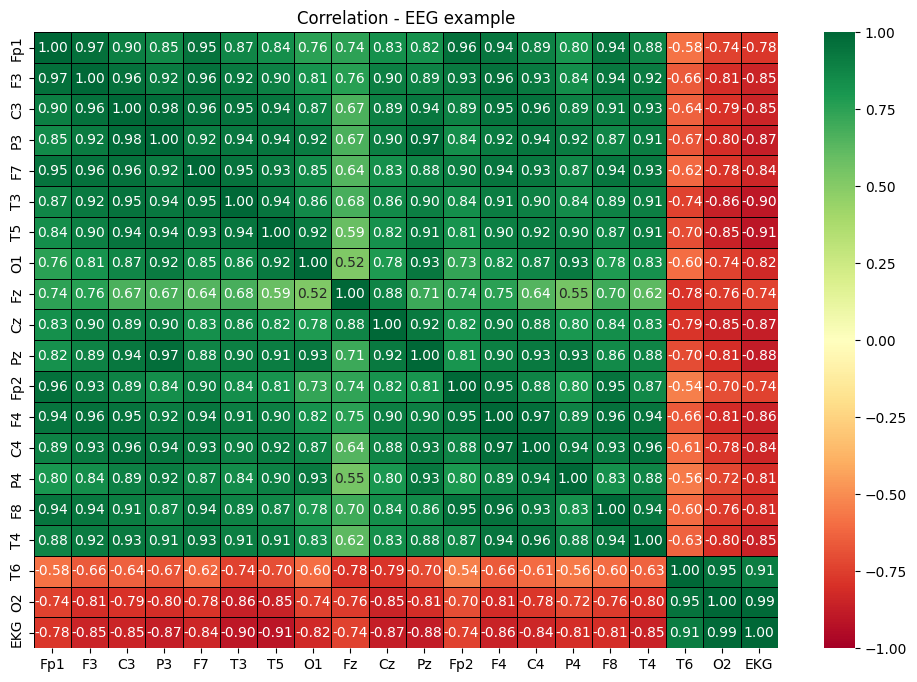

In [33]:
# correlation matrix
cor_eeg = df_eeg[features_eeg].corr(method='pearson')
plt.figure(figsize=(12,8))
sns.heatmap(cor_eeg, annot=True,
            fmt='.2f',
            linecolor='black', linewidths=.5,
            cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title('Correlation - EEG example')
plt.show()

<a id='ex_spec'></a>
# Spectrogram File Example

In [34]:
# load spectrogram file
df_spec = pd.read_parquet('../input/hms-harmful-brain-activity-classification/train_spectrograms/1000646093.parquet')

In [35]:
# preview
df_spec.head()

time  LL_0.59  LL_0.78  LL_0.98  LL_1.17  LL_1.37  LL_1.56  LL_1.76  \
0     1     3.64     2.91     1.17     1.14     0.50     0.53     0.28   
1     3     4.48     4.16     1.71     1.56     0.30     0.33     0.22   
2     5     4.88     4.96     2.09     2.15     0.43     0.41     0.26   
3     7     4.52     2.67     2.34     1.85     0.31     0.33     0.30   
4     9     4.20     3.47     2.34     1.92     0.52     0.32     0.32   

   LL_1.95  LL_2.15  LL_2.34  LL_2.54  LL_2.73  LL_2.93  LL_3.13  LL_3.32  \
0     0.26     0.18     0.18     0.09     0.13     0.09     0.10     0.14   
1     0.26     0.13     0.13     0.17     0.12     0.12     0.16     0.13   
2     0.28     0.23     0.20     0.15     0.13     0.18     0.09     0.13   
3     0.31     0.10     0.13     0.12     0.13     0.07     0.09     0.13   
4     0.28     0.23     0.23     0.19     0.21     0.20     0.08     0.06   

   LL_3.52  LL_3.71  LL_3.91  LL_4.1  LL_4.3  LL_4.49  LL_4.69  LL_4.88  \
0     0.11     0.11     0.08    0.05    0.05     0.03     0.14     0.15   
1     0.12     0.10     0.08    0.07    0.04     0.04     0.06     0.07   
2     0.13     0.10     0.08    0.07    0.04     0.03     0.05     0.04   
3     0.12     0.12     0.07    0.10    0.07     0.10     0.09     0.07   
4     0.05     0.06     0.11    0.11    0.14     0.13     0.11     0.11   

   LL_5.08  LL_5.27  LL_5.47  LL_5.66  LL_5.86  LL_6.05  LL_6.25  LL_6.45  \
0     0.19     0.29     0.22     0.19     0.14     0.12     0.19     0.15   
1     0.10     0.28     0.16     0.19     0.21     0.11     0.09     0.12   
2     0.05     0.13     0.14     0.16     0.16     0.08     0.06     0.07   
3     0.08     0.04     0.11     0.15     0.17     0.19     0.31     0.24   
4     0.07     0.05     0.07     0.10     0.12     0.17     0.14     0.14   

   LL_6.64  LL_6.84  LL_7.03  LL_7.23  LL_7.42  LL_7.62  LL_7.81  LL_8.01  \
0     0.13     0.27     0.17     0.20     0.36     0.24     0.33     0.24   
1     0.21     0.24     0.23     0.41     0.59     0.54     0.62     0.59   
2     0.13     0.08     0.21     0.47     0.55     0.62     0.65     0.36   
3     0.30     0.33     0.62     0.70     0.63     0.72     0.42     0.45   
4     0.26     0.13     0.43     0.40     0.24     0.86     0.63     0.80   

   LL_8.2  LL_8.4  LL_8.59  LL_8.79  LL_8.98  LL_9.18  LL_9.38  LL_9.57  \
0    0.21    0.16     0.07     0.11     0.11     0.14     0.25     0.17   
1    0.36    0.33     0.30     0.19     0.09     0.19     0.22     0.18   
2    0.20    0.20     0.18     0.12     0.18     0.19     0.32     0.33   
3    0.37    0.38     0.31     0.09     0.09     0.15     0.23     0.26   
4    0.83    0.50     0.28     0.27     0.16     0.18     0.18     0.32   

   LL_9.77  LL_9.96  LL_10.16  LL_10.35  LL_10.55  LL_10.74  LL_10.94  \
0     0.12     0.27      0.27      0.59      0.61      0.55      0.46   
1     0.21     0.25      0.17      0.54      0.47      0.62      0.50   
2     0.29     0.29      0.20      0.17      0.16      0.14      0.14   
3     0.33     0.28      0.20      0.11      0.09      0.06      0.06   
4     0.31     0.36      0.40      0.40      0.33      0.13      0.18   

   LL_11.13  LL_11.33  LL_11.52  LL_11.72  LL_11.91  LL_12.11  LL_12.3  \
0      0.38      0.36      0.34      0.38      0.58      0.62     0.65   
1      0.42      0.32      0.49      0.59      0.71      0.68     0.56   
2      0.14      0.16      0.18      0.12      0.23      0.20     0.12   
3      0.09      0.09      0.13      0.37      0.27      0.27     0.28   
4      0.15      0.23      0.29      0.31      0.31      0.30     0.14   

   LL_12.5  LL_12.7  LL_12.89  LL_13.09  LL_13.28  LL_13.48  LL_13.67  \
0     0.51     0.47      0.23      0.17      0.32      0.45      1.11   
1     0.33     0.34      0.29      0.22      0.21      0.78      0.75   
2     0.30     0.39      0.39      0.32      0.39      0.22      0.21   
3     0.17     0.24      0.38      0.35      0.90      1.29      1.65   
4     0.11     0.2

In [36]:
# show structure
df_spec.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 401 columns):
 #    Column    Non-Null Count  Dtype  
---   ------    --------------  -----  
 0    time      300 non-null    int64  
 1    LL_0.59   300 non-null    float32
 2    LL_0.78   300 non-null    float32
 3    LL_0.98   300 non-null    float32
 4    LL_1.17   300 non-null    float32
 5    LL_1.37   300 non-null    float32
 6    LL_1.56   300 non-null    float32
 7    LL_1.76   300 non-null    float32
 8    LL_1.95   300 non-null    float32
 9    LL_2.15   300 non-null    float32
 10   LL_2.34   300 non-null    float32
 11   LL_2.54   300 non-null    float32
 12   LL_2.73   300 non-null    float32
 13   LL_2.93   300 non-null    float32
 14   LL_3.13   300 non-null    float32
 15   LL_3.32   300 non-null    float32
 16   LL_3.52   300 non-null    float32
 17   LL_3.71   300 non-null    float32
 18   LL_3.91   300 non-null    float32
 19   LL_4.1    300 non-null    float32
 20   LL_4.3  

In [37]:
# basis stats
df_spec.describe()

time     LL_0.59     LL_0.78     LL_0.98     LL_1.17     LL_1.37  \
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000   
mean   300.000000   10.200433   10.975000    9.080900    7.423566    4.967433   
std    173.493516   14.765941   17.993021   17.973993   13.765503   11.332740   
min      1.000000    2.030000    1.470000    1.020000    0.970000    0.170000   
25%    150.500000    3.655000    3.060000    1.710000    1.620000    0.507500   
50%    300.000000    4.530000    4.130000    2.125000    1.990000    0.650000   
75%    449.500000    6.307500    5.780000    3.010000    2.722500    1.050000   
max    599.000000   79.629997   89.389999   98.750000   67.599998   66.820000   

          LL_1.56     LL_1.76     LL_1.95     LL_2.15     LL_2.34     LL_2.54  \
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000   
mean     3.799633    3.268933    2.791833    2.457900    2.200567    1.757667   
std      8.824636    7.734348    6.478756    5.737869    5.261404    4.063639   
min      0.170000    0.120000    0.080000    0.060000    0.060000    0.030000   
25%      0.410000    0.330000    0.280000    0.207500    0.160000    0.140000   
50%      0.525000    0.430000    0.360000    0.290000    0.230000    0.220000   
75%      0.720000    0.622500    0.550000    0.472500    0.392500    0.370000   
max     54.830002   52.959999   40.299999   37.369999   37.330002   24.889999   

          LL_2.73     LL_2.93     LL_3.13     LL_3.32     LL_3.52     LL_3.71  \
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000   
mean     1.614033    1.380400    1.174567    1.220067    1.214800    1.253633   
std      3.737301    3.125951    2.564308    2.767300    2.775163    2.957976   
min      0.030000    0.030000    0.040000    0.030000    0.020000    0.020000   
25%      0.120000    0.130000    0.110000    0.110000    0.100000    0.090000   
50%      0.210000    0.200000    0.180000    0.170000    0.170000    0.150000   
75%      0.370000    0.352500    0.350000    0.352500    0.330000    0.312500   
max     21.230000   16.379999   16.059999   21.500000   17.920000   18.160000   

          LL_3.91      LL_4.1      LL_4.3     LL_4.49     LL_4.69     LL_4.88  \
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000   
mean     1.290433    1.400067    1.519667    1.687033    1.673867    1.722433   
std      3.001436    3.370867    3.845320    4.482931    4.458741    4.561536   
min      0.020000    0.020000    0.020000    0.010000    0.010000    0.010000   
25%      0.080000    0.080000    0.090000    0.090000    0.090000    0.090000   
50%      0.170000    0.170000    0.170000    0.180000    0.170000    0.175000   
75%      0.332500    0.340000    0.340000    0.362500    0.380000    0.372500   
max     16.660000   23.129999   29.530001   30.230000   27.389999   31.719999   

          LL_5.08     LL_5.27     LL_5.47     LL_5.66     LL_5.86     LL_6.05  \
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000   
mean     1.755600    1.721700    1.806633    1.969233    2.028633    2.126800   
std      4.444527    4.244489    4.557738    5.425345    5.459406    5.776060   
min      0.010000    0.010000    0.010000    0.020000    0.020000    0.020000   
25%      0.090000    0.090000    0.110000    0.110000    0.120000    0.120000   
50%      0.170000    0.180000    0.195000    0.195000    0.210000    0.230000   
75%      0.360000    0.372500    0.372500    0.422500    0.435000    0.432500   
max     27.559999   22.290001   35.090000   48.689999   40.889999   48.209999   

          LL_6.25     LL_6.45     LL_6.64     LL_6.84     LL_7.03     LL_7.23  \
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000   
mean     2.203067    2.368767    2.343034    2.360400    2.412567    2.454934   
std      5.813892    6.492438    5.886540    5.670640    5.717975    5.998732   
min      0.020000    0.010000    0.0100

In [ ]:
# # export to file
# df_spec.to_csv('spec_example.csv')

### Some plots:

In [38]:
# plotting function given a specific frequency
def plot_spec(i_frequency):
    feature_1 = 'LL_' + i_frequency
    feature_2 = 'RL_' + i_frequency
    feature_3 = 'RP_' + i_frequency
    feature_4 = 'LP_' + i_frequency
    plt.figure(figsize=(10,3))
    plt.scatter(df_spec.time, df_spec[feature_1], s=5, label='LL')
    plt.scatter(df_spec.time, df_spec[feature_2], s=5, label='RL')
    plt.scatter(df_spec.time, df_spec[feature_3], s=5, label='RP')
    plt.scatter(df_spec.time, df_spec[feature_4], s=5, label='LP')
    plt.legend(loc='upper right')
    plt.title('Frequency=' + i_frequency)
    plt.grid()
    plt.show()

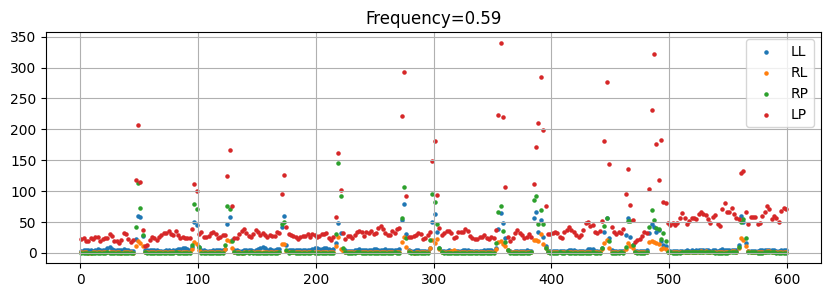

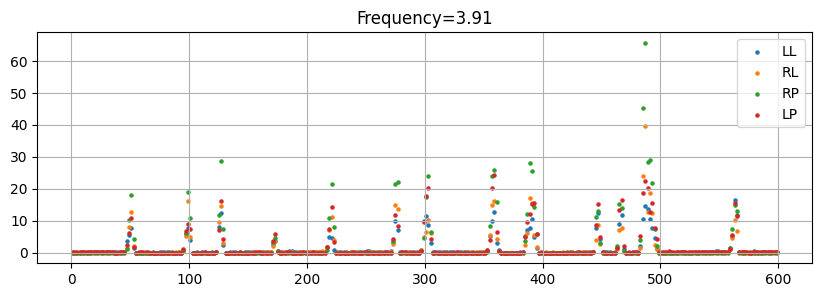

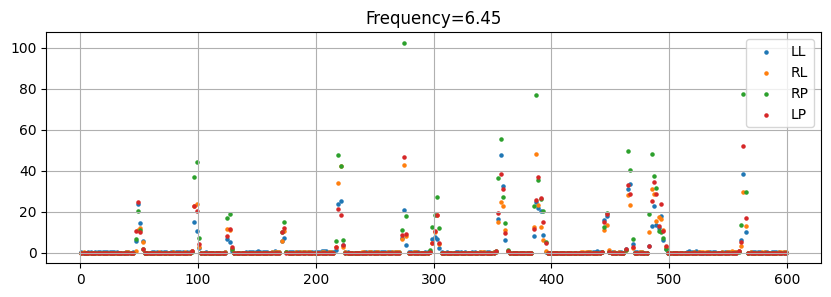

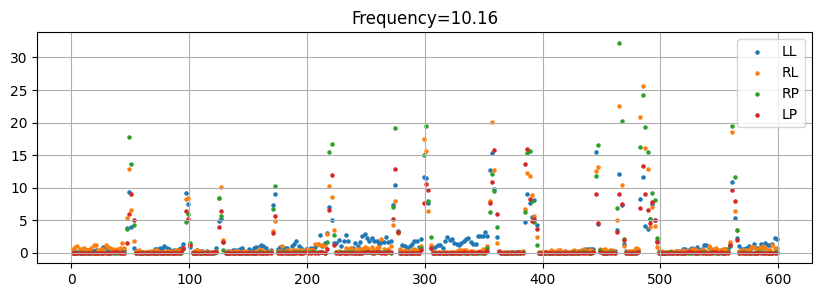

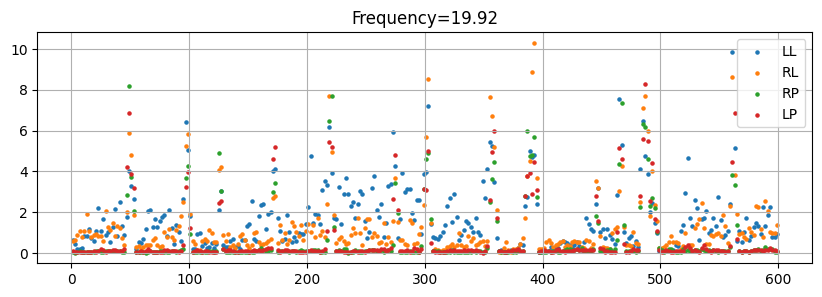

In [39]:
# plot for a few frequencies
frequencies = ['0.59', '3.91', '6.45', '10.16', '19.92']
for freq in frequencies:
    plot_spec(freq)

In [40]:
# frequencies
freqs = [0.59, 0.78, 0.98, 1.17, 1.37, 1.56, 1.76, 1.95, 2.15, 2.34, 2.54, 2.73, 2.93, 3.13, 3.32, 
         3.52, 3.71, 3.91, 4.1, 4.3, 4.49, 4.69, 4.88, 5.08, 5.27, 5.47, 5.66, 5.86, 6.05, 6.25,
         6.45, 6.64, 6.84, 7.03, 7.23, 7.42, 7.62, 7.81, 8.01, 8.2, 8.4, 8.59, 8.79, 8.98, 9.18,
         9.38, 9.57, 9.77, 9.96, 10.16, 10.35, 10.55, 10.74, 10.94, 11.13, 11.33, 11.52, 11.72,
         11.91, 12.11, 12.3, 12.5, 12.7, 12.89, 13.09, 13.28, 13.48, 13.67, 13.87, 14.06, 14.26,
         14.45, 14.65, 14.84, 15.04, 15.23, 15.43, 15.63, 15.82, 16.02, 16.21, 16.41, 16.6, 16.8,
         16.99, 17.19, 17.38, 17.58, 17.77, 17.97, 18.16, 18.36, 18.55, 18.75, 18.95, 19.14, 19.34,
         19.53, 19.73, 19.92]

In [41]:
# LL columns for all frequencies
cols_LL = ['LL_' + str(f) for f in freqs]

In [42]:
# basic stats
df_spec[cols_LL].describe()

LL_0.59     LL_0.78     LL_0.98     LL_1.17     LL_1.37     LL_1.56  \
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000   
mean    10.200433   10.975000    9.080900    7.423566    4.967433    3.799633   
std     14.765941   17.993021   17.973993   13.765503   11.332740    8.824636   
min      2.030000    1.470000    1.020000    0.970000    0.170000    0.170000   
25%      3.655000    3.060000    1.710000    1.620000    0.507500    0.410000   
50%      4.530000    4.130000    2.125000    1.990000    0.650000    0.525000   
75%      6.307500    5.780000    3.010000    2.722500    1.050000    0.720000   
max     79.629997   89.389999   98.750000   67.599998   66.820000   54.830002   

          LL_1.76     LL_1.95     LL_2.15     LL_2.34     LL_2.54     LL_2.73  \
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000   
mean     3.268933    2.791833    2.457900    2.200567    1.757667    1.614033   
std      7.734348    6.478756    5.737869    5.261404    4.063639    3.737301   
min      0.120000    0.080000    0.060000    0.060000    0.030000    0.030000   
25%      0.330000    0.280000    0.207500    0.160000    0.140000    0.120000   
50%      0.430000    0.360000    0.290000    0.230000    0.220000    0.210000   
75%      0.622500    0.550000    0.472500    0.392500    0.370000    0.370000   
max     52.959999   40.299999   37.369999   37.330002   24.889999   21.230000   

          LL_2.93     LL_3.13     LL_3.32     LL_3.52     LL_3.71     LL_3.91  \
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000   
mean     1.380400    1.174567    1.220067    1.214800    1.253633    1.290433   
std      3.125951    2.564308    2.767300    2.775163    2.957976    3.001436   
min      0.030000    0.040000    0.030000    0.020000    0.020000    0.020000   
25%      0.130000    0.110000    0.110000    0.100000    0.090000    0.080000   
50%      0.200000    0.180000    0.170000    0.170000    0.150000    0.170000   
75%      0.352500    0.350000    0.352500    0.330000    0.312500    0.332500   
max     16.379999   16.059999   21.500000   17.920000   18.160000   16.660000   

           LL_4.1      LL_4.3     LL_4.49     LL_4.69     LL_4.88     LL_5.08  \
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000   
mean     1.400067    1.519667    1.687033    1.673867    1.722433    1.755600   
std      3.370867    3.845320    4.482931    4.458741    4.561536    4.444527   
min      0.020000    0.020000    0.010000    0.010000    0.010000    0.010000   
25%      0.080000    0.090000    0.090000    0.090000    0.090000    0.090000   
50%      0.170000    0.170000    0.180000    0.170000    0.175000    0.170000   
75%      0.340000    0.340000    0.362500    0.380000    0.372500    0.360000   
max     23.129999   29.530001   30.230000   27.389999   31.719999   27.559999   

          LL_5.27     LL_5.47     LL_5.66     LL_5.86     LL_6.05     LL_6.25  \
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000   
mean     1.721700    1.806633    1.969233    2.028633    2.126800    2.203067   
std      4.244489    4.557738    5.425345    5.459406    5.776060    5.813892   
min      0.010000    0.010000    0.020000    0.020000    0.020000    0.020000   
25%      0.090000    0.110000    0.110000    0.120000    0.120000    0.117500   
50%      0.180000    0.195000    0.195000    0.210000    0.230000    0.230000   
75%      0.372500    0.372500    0.422500    0.435000    0.432500    0.470000   
max     22.290001   35.090000   48.689999   40.889999   48.209999   39.340000   

          LL_6.45     LL_6.64     LL_6.84     LL_7.03     LL_7.23     LL_7.42  \
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000   
mean     2.368767    2.343034    2.360400    2.412567    2.454934    2.491534   
std      6.492438    5.886540    5.670640    5.717975    5.998732    6.123145   
min      0.010000    0.010000    0.0

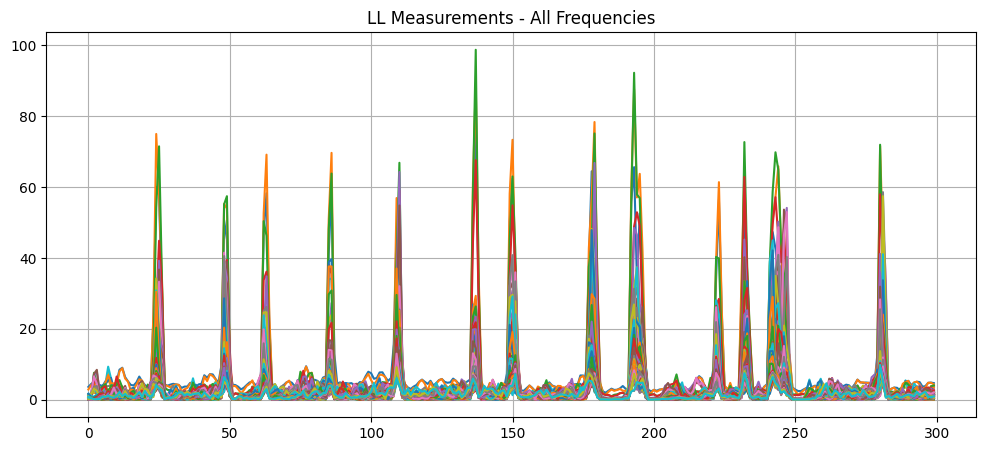

In [43]:
# plot all frequencies in one chart
plt.figure(figsize=(12,5))
plt.plot(df_spec[cols_LL])
plt.title('LL Measurements - All Frequencies')
plt.grid()
plt.show()

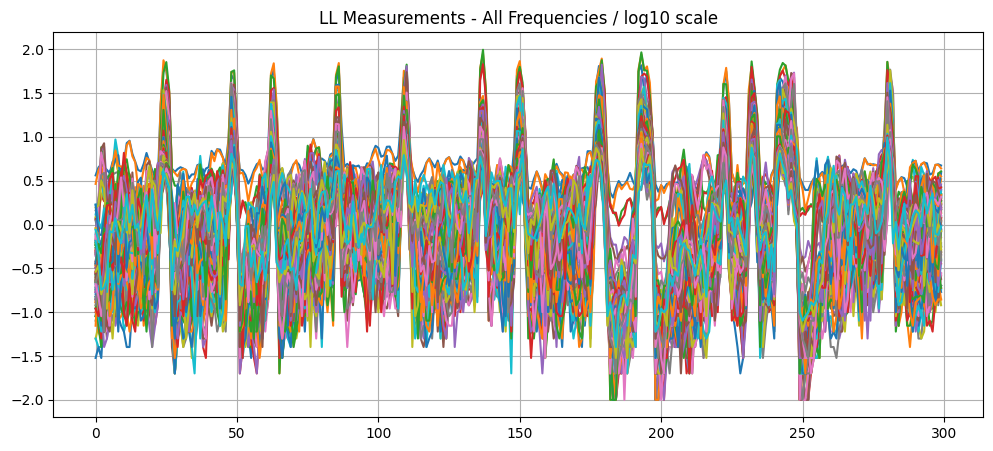

In [44]:
# plot all frequencies in one chart - log scale
plt.figure(figsize=(12,5))
plt.plot(np.log10(df_spec[cols_LL]))
plt.title('LL Measurements - All Frequencies / log10 scale')
plt.grid()
plt.show()

<a id='sub'></a>
# Test and Submission File

In [45]:
# load (dummy) test data
df_test = pd.read_csv('../input/hms-harmful-brain-activity-classification/test.csv')
df_test

spectrogram_id      eeg_id  patient_id
0          853520  3911565283        6885

In [46]:
# load submission file
df_sub = pd.read_csv('../input/hms-harmful-brain-activity-classification/sample_submission.csv')
df_sub

eeg_id  seizure_vote  lpd_vote  gpd_vote  lrda_vote  grda_vote  \
0  3911565283      0.166667  0.166667  0.166667   0.166667   0.166667   

   other_vote  
0    0.166667

#### Simply use (grouped) means for a first baseline. See also this notebook: https://www.kaggle.com/code/seshurajup/eda-train-csv

In [47]:
# simply use means for a first baseline
mean_values = df_train_unique_votes[features_vote].mean()

df_sub.seizure_vote = mean_values['seizure_vote']
df_sub.lpd_vote = mean_values['lpd_vote']
df_sub.gpd_vote = mean_values['gpd_vote']
df_sub.lrda_vote = mean_values['lrda_vote']
df_sub.grda_vote = mean_values['grda_vote']
df_sub.other_vote = mean_values['other_vote']

df_sub

eeg_id  seizure_vote  lpd_vote  gpd_vote  lrda_vote  grda_vote  \
0  3911565283       0.15281  0.142456  0.104062   0.065407   0.114851   

   other_vote  
0    0.420413

In [ ]:
# # save submission file
# df_sub.to_csv('submission.csv', index=False)